Project Report Title 


Dataset Link: https://collegescorecard.ed.gov/data/ Fiscal S

Authors: Sarah Mueller, Alberto Veloso, Grant Ball

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns

# Data Reading and Preparation 

In [67]:
#df = pd.read_csv('initialProjectData.data', header=0, na_values = "?", comment='\t',sep=",", skipinitialspace=True)#1. Load transfusion.data into data frame
#pd.set_option('display.max_colwidth',1000)# A google-collabs/pandas quirk that blocks us from fully examining the coeficients for Q8
#pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", None, "display.max_columns", None)
#df = pd.read_csv('initialProjectData.data',sep="\t")#1. Load transfusion.data into data frame
df = pd.read_csv('sdf18_1a.txt',sep="\t")#1. Load transfusion.data into data frame
#df.drop(columns={'IE3B1','IE3B2','ISTE3','IE3B14','IE3B16','IE4A1','IE4A2','IE4B1','IE4B2','IE4C1','IE4C2','IE4D',
#                 'IE4E1','IE4E2','ISTE4','ITE5','IE61','IE62','IE63','ISTE6','IE7A1','IE7A2','ISTE7','IE81','IE82',
#                 'IE9A','IE9B','IE9C','IE9D','IE91','ISTE9','ITE10','ITE11','IX12C','IX12D','IX12E','IX12F','ITX12','INCE13','IADA','IA14A','IA14B','IMEMBR00'}, inplace=True)
#'IE244	IE245	IE246	IE247	IE248	ITE24	IE252	IE253	IE254	IE255	IE256	IE257	IE258	ITE25	IE262	IE263	IE264	IE265	IE266	IE267	IE268	ITE26	ISTE22	ISTE23	ISTE24	ISTE25	ISTE26	ISTE27	ISTE28	ISTE2T	IE3A11	IE3A12	IE3A13	IE3A14	IE3A2	IE3A16	IE3A1	IE3B11	IE3B12	IE3B13


#,'E11A'

#df.drop(df.columns.difference(['STNAME','R1A','R1N','STR1','R3','STR4','TE10','TE11']), 1, inplace=True)

df.drop(df.columns.difference(['STNAME','TOTALREV', 'TFEDREV', 'TLOCREV', 'Z32', 'V93', 'C10', 'TSTREV', 'Z34', 'K10', 'V33']), 1, inplace=True)

#df.drop(df.columns.difference(['STNAME','z34']), 1, inplace=True)
df.rename(columns={'STNAME':'State'}, inplace = True)
df.rename(columns={'TLOCREV':'Total Local Revenue'}, inplace = True)
df.rename(columns={'TFEDREV':'Total Fed Rev'}, inplace = True)
df.rename(columns={'TOTALREV':'Total Rev (=state+local+fed)'}, inplace = True)
df.rename(columns={'Z32':'Total salaries'}, inplace = True)
df.rename(columns={'V93':'Textbook Costs'}, inplace = True)
#df.rename(columns={'T06':'Property Taxes (revenue)'}, inplace = True) a bad variable; primarily 'non-applicable' values
df.rename(columns={'C10':'STATE REVENUE - SCHOOL LUNCH PROGRAMS'}, inplace = True)
df.rename(columns={'TSTREV':'Total State Revenue'}, inplace = True)
df.rename(columns={'Z34':'Total employee benefits'}, inplace = True)
df.rename(columns={'TOTALEXP':'Total expenditures'}, inplace = True)
df.rename(columns={'K10':'CAPITAL OUTLAY - OTHER EQUIPMENT'}, inplace = True)
df.rename(columns={'V33':'# of students'}, inplace = True)


#drop all not texas
df = df[df.State == 'Texas']
#df_age_negative = df[ df['State'] == 'California' ] # Step 1
#df = df.drop(df_age_negative.index, axis=0) # Step 2

#df.head(n=33)
#print(df.loc[df['State'] == 'Texas'])
#df = df.loc[df['State'] == 'Texas']
#df = df.drop("Alabama")
#df = df.loc[[0]]
#df.head(n=155)

#FEATURE NORMALIZATION

df =df.replace(-2, 0) # -2 means the data 'isn't applicable' so let's make it 0
#will this cause us outliers?


df['Poverty'] = df['Total State Revenue'].apply(lambda x:'1' if x in range(0,8216000) else '2')


df.head(n=155)

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/var/folders/3j/4ysxr4wj2md7xk42h1_2r2_c0000gn/T/ipykernel_8026/2760551688.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(df.columns.difference(['STNAME','TOTALREV', 'TFEDREV', 'TLOCREV', 'Z32', 'V93', 'C10', 'TSTREV', 'Z34', 'K10', 'V33']), 1, inplace=True)


,State,# of students,Total Rev (=state+local+fed),Total Fed Rev,Total State Revenue,STATE REVENUE - SCHOOL LUNCH PROGRAMS,Total Local Revenue,CAPITAL OUTLAY - OTHER EQUIPMENT,Total salaries,Total employee benefits,Textbook Costs,Poverty
15806,Texas,367,7486000,612000,3374000,5000,3500000,423000,2770000,532000,3000,1
15807,Texas,261,4761000,228000,2120000,1000,2413000,79000,2131000,299000,11000,1
15808,Texas,313,4535000,304000,759000,1000,3472000,146000,1907000,358000,11000,1
15809,Texas,271,5998000,909000,2570000,0,2519000,0,3914000,325000,0,1
15810,Texas,158,8561000,24000,2162000,6000,6375000,68000,2054000,334000,21000,1
15811,Texas,227,3457000,128000,978000,0,2351000,9000,1610000,251000,5000,1
15812,Texas,174,2432000,178000,833000,1000,1421000,0,1259000,234000,8000,1
15813,Texas,6450,81785000,1982000,7216000,6000,72587000,1252000,38327000,6156000,447000,1
15814,Texas,2445,29440000,1339000,2552000,4000,25549000,82000,14976000,2493000,27000,1
15815,Texas,19862,215066000,13149000,88317000,46000,113600000,1767000,123348000,21479000,718000,2


In [68]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


df.drop(['State'], axis = 1,inplace=True)

# Assign values of ```presence``` column to y, note you have to use .values method
y = df.Poverty.values
# Drop 'presence' column from data frame,
df.drop(columns=['Poverty'], inplace=True)
# Assign df values to x
x = df.values
# View shape of x and y
x.shape, y.shape

# Use stratify = y and test_size = 0.2 and random_state = 1

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state=1, stratify=y)

# Create a KNN model using sklearn library, k=3 
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model with the train data
knn.fit(xtrain, ytrain)


df.head(n=155)

,# of students,Total Rev (=state+local+fed),Total Fed Rev,Total State Revenue,STATE REVENUE - SCHOOL LUNCH PROGRAMS,Total Local Revenue,CAPITAL OUTLAY - OTHER EQUIPMENT,Total salaries,Total employee benefits,Textbook Costs
15806,367,7486000,612000,3374000,5000,3500000,423000,2770000,532000,3000
15807,261,4761000,228000,2120000,1000,2413000,79000,2131000,299000,11000
15808,313,4535000,304000,759000,1000,3472000,146000,1907000,358000,11000
15809,271,5998000,909000,2570000,0,2519000,0,3914000,325000,0
15810,158,8561000,24000,2162000,6000,6375000,68000,2054000,334000,21000
15811,227,3457000,128000,978000,0,2351000,9000,1610000,251000,5000
15812,174,2432000,178000,833000,1000,1421000,0,1259000,234000,8000
15813,6450,81785000,1982000,7216000,6000,72587000,1252000,38327000,6156000,447000
15814,2445,29440000,1339000,2552000,4000,25549000,82000,14976000,2493000,27000
15815,19862,215066000,13149000,88317000,46000,113600000,1767000,123348000,21479000,718000


In [79]:
#  Predict xtest and view first 25 predicitons
print(knn.predict(xtest)[0:50])

# Compare prediction with real ytest 25 predictions
print(ytest[0:50])

# Print the score with test data
print(knn.score(xtest, ytest))

#rescale only real value columns
realcols = ['Total Local Revenue','Total Fed Rev','Total Rev (=state+local+fed)','Total salaries','Textbook Costs','STATE REVENUE - SCHOOL LUNCH PROGRAMS','Total State Revenue','Total employee benefits','CAPITAL OUTLAY - OTHER EQUIPMENT','# of students' ]

# For each column normalize ```df[col] as (x - mean) / standard_deviation```
for col in realcols:
    mean = df[col].mean()
    std = df[col].std()
    df[col] = (df[col] - mean)/std

['1' '1' '1' '1' '1' '1' '2' '1' '2' '1' '2' '1' '2' '1' '1' '2' '1' '2'
 '1' '1' '1' '1' '2' '1' '2' '2' '2' '1' '2' '1' '1' '2' '1' '1' '1' '1'
 '2' '2' '1' '1' '1' '1' '1' '2' '1' '1' '1' '1' '1' '2']
['1' '1' '1' '2' '1' '1' '2' '1' '2' '1' '2' '1' '2' '1' '1' '2' '1' '2'
 '1' '1' '1' '1' '2' '1' '2' '2' '1' '1' '1' '1' '1' '2' '1' '1' '1' '1'
 '1' '2' '1' '1' '1' '1' '1' '2' '1' '1' '1' '1' '1' '2']
0.9354838709677419


In [80]:
# update x
x = df.values

# Train test Split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state=1, stratify=y)

# Model Initialization
knn = KNeighborsClassifier(n_neighbors=3)

# Model fitting with training data
knn.fit(xtrain, ytrain)

# Now print score on test data
knn.score(xtest, ytest)

0.9354838709677419

[0.9314516129032258, 0.9395161290322581, 0.9354838709677419, 0.9274193548387096, 0.9354838709677419, 0.9274193548387096, 0.9274193548387096, 0.9274193548387096, 0.9314516129032258, 0.9233870967741935, 0.9314516129032258, 0.9314516129032258, 0.9395161290322581, 0.9354838709677419, 0.9354838709677419, 0.9354838709677419, 0.9314516129032258, 0.9314516129032258, 0.9354838709677419, 0.9314516129032258, 0.9314516129032258, 0.9314516129032258, 0.9354838709677419, 0.9233870967741935, 0.9274193548387096, 0.9274193548387096, 0.9314516129032258, 0.9314516129032258, 0.9354838709677419, 0.9314516129032258, 0.9395161290322581, 0.9395161290322581, 0.9395161290322581, 0.9354838709677419, 0.9395161290322581, 0.9395161290322581, 0.9435483870967742, 0.9354838709677419, 0.9354838709677419, 0.9274193548387096, 0.9274193548387096, 0.9274193548387096, 0.9233870967741935, 0.9274193548387096, 0.9274193548387096, 0.9274193548387096, 0.9233870967741935, 0.9233870967741935, 0.9233870967741935]
BESt VALUE OF K 37


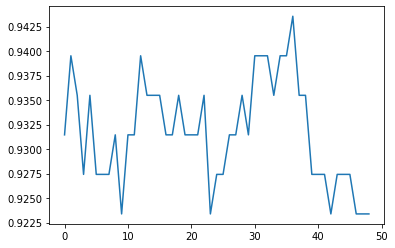

In [81]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def returnScore(k, xtrain, xtest, ytrain, ytest):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(xtrain, ytrain)
  return knn.score(xtest, ytest)


result = [*map(lambda i:returnScore(i,xtrain, xtest, ytrain, ytest), range(1,50))]
print(result)
plt.plot(result)


print('BESt VALUE OF K',np.argmax(result) + 1 )


bestknn = KNeighborsClassifier(n_neighbors=np.argmax(result) + 1)

bestknn.fit(xtrain, ytrain)
print(bestknn.score(xtest, ytest))


ypred = bestknn.predict(xtest)
matrix = confusion_matrix(ytest, ypred)
print(matrix)

<Figure size 432x288 with 0 Axes>

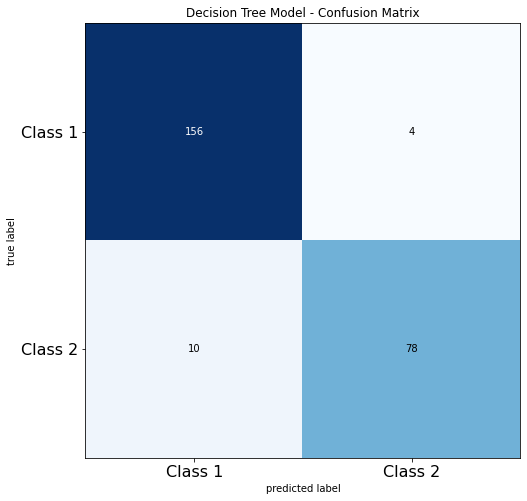

In [82]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(ytest, ypred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Decision Tree Model - Confusion Matrix")
plt.xticks(range(2), ["Class 1","Class 2"], fontsize=16)
plt.yticks(range(2), ["Class 1","Class 2"], fontsize=16)
plt.show()